In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np

In [2]:
url = requests.get('https://en.wikipedia.org/wiki/Transistor_count').text

In [3]:
#pull html from wiki page
soup = BeautifulSoup(url, 'lxml')

In [4]:
#locate the wikitable in the page
ttable = soup.find('table', {'class', 'wikitable sortable'})

In [5]:
#make a list of all table row entries & remove titles
rows = ttable.find_all('tr')
rows.pop(0)

<tr>
<th><a href="/wiki/Microprocessor" title="Microprocessor">Processor</a>
</th>
<th data-sort-type="number"><a class="mw-redirect" href="/wiki/MOS_transistor" title="MOS transistor">MOS transistor</a> count
</th>
<th>Date of<br/>introduction
</th>
<th>Designer
</th>
<th data-sort-type="number"><a href="/wiki/MOSFET" title="MOSFET">MOS</a> <a href="/wiki/Semiconductor_device_fabrication" title="Semiconductor device fabrication">process</a><br/>(<a href="/wiki/Nanometre" title="Nanometre">nm</a>)
</th>
<th data-sort-type="number">Area (<a href="/wiki/Millimetre" title="Millimetre">mm</a><sup>2</sup>)
</th></tr>

In [7]:
#pull transistor numbers and years from rows and append them to lists
tnum = []
years = []
for row in rows:
    l = list(row.children)
    tr = str(l[3])
    st = tr.index('>') + 1
    #weird exception case for a 2-width row
    if st > 4 or len(l)< 6:
        continue
    i = st
    while tr[i].isdecimal() or tr[i] == ',':
        i = i + 1
    end = i
    trans = int(tr[st:end].replace(',', ''))
    tnum.append(trans)
    y = str(l[5])
    st = y.index('>') + 1
    end = y.index('<', 1)
    years.append(int(y[st:end]))

#append weird 2 row exception case
tnum.append(2000000000)
years.append(2015)

In [8]:
#apply log base 2 transform of data to make relation between transistor number and year more obvious
import math
ltnum = [math.log(num, 2) for num in tnum]

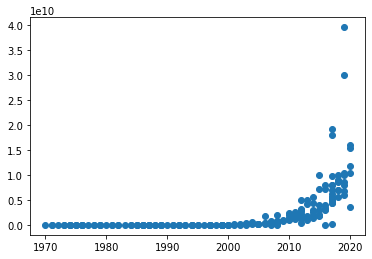

In [9]:
#plot raw data
import matplotlib.pyplot as plt
plt.plot(years, tnum, 'o')

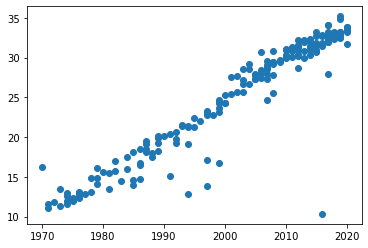

In [10]:
#plot with log transform
plt.plot(years, ltnum, 'o')

In [11]:
#compute summations of x_m, y_m, x^2_m, x_m*y_m where M is number of entries
m = len(years)
yearspast1970 = [float(year - 1970) for year in years]
xbar = 0
ybar = 0
xybar = 0
x2bar = 0
for i in range(0, m):
    xbar = xbar + yearspast1970[i]
    ybar = ybar + ltnum[i]
    x2bar = x2bar + yearspast1970[i] ** 2
    xybar = xybar + ltnum[i] * yearspast1970[i]
print(xbar)
print(ybar)
print(xybar)
print(x2bar)

6115.0
4841.954239830337
173775.4953412702
235817.0


In [12]:
#compute estimated least squares solution vector a1hat and a2hat from formula
det = (x2bar - m * xbar ** 2)
a1hat = (xybar - m * xbar * ybar) / det
a2hat = (ybar * x2bar - xbar * xybar) / det
print(a1hat, '\n', a2hat)

0.7918177054021395 
 -0.011028703745525129


In [13]:
#convert to np array to make math operations easier
yearspast1970 = np.array(yearspast1970)

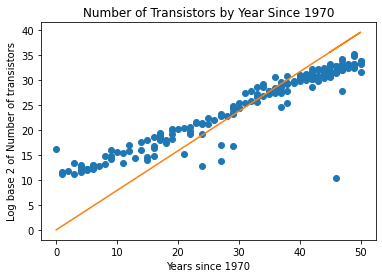

In [14]:
#plot data with least squares estimate
plt.plot(yearspast1970, ltnum, 'o')
plt.plot(yearspast1970, yearspast1970 * a1hat + a2hat)
plt.title('Number of Transistors by Year Since 1970')
plt.ylabel('Log base 2 of Number of transistors')
plt.xlabel('Years since 1970')
plt.savefig('mooreslaw.jpg')